# Gene Ontology - Rhea Analysis

Contents:
    
 * [Analysis of xrefs in GO](#GO-Xref-Analysis)
    * Loading xref table
    * Venn Diagrams
    * UpSet Diagrams
 * [Analysis of xrefs in Rhea](#Rhea-Xref-Analysis)
 
To access the underlying report TSVs, go to https://github.com/cmungall/reactioner/tree/master/reports


## GO Xref Analysis

![img](https://s3.amazonaws.com/go-public/image/go-logo-icon.png)

The GO maintains xrefs to equivalent, near-equivalent or similar IDs in other ontologies/databases, for example:

```
[Term]
id: GO:0008712
name: ADP-glyceromanno-heptose 6-epimerase activity
namespace: molecular_function
def: "Catalysis of the reaction: ADP-D-glycero-D-manno-heptose = ADP-L-glycero-D-manno-heptose." [EC:5.1.3.20, RHEA:17577]
synonym: "ADP-L-glycero-D-manno-heptose 6-epimerase activity" EXACT [EC:5.1.3.20]
synonym: "ADPglyceromanno-heptose 6-epimerase activity" EXACT [EC:5.1.3.20]
xref: EC:5.1.3.20
xref: KEGG:R05176
xref: MetaCyc:5.1.3.20-RXN
xref: RHEA:17577
is_a: GO:0016857 ! racemase and epimerase activity, acting on carbohydrates and derivatives
```

Some of these (e.g. RHEA) are 1:1, others are not. Not all terms have xrefs to an external source. We first analyze which databases are referenced, and how these overlap

In [5]:
## Import libraries and methods
import pandas as pd
from notebook_utils import create_venn, create_upset
%matplotlib inline

We make use of https://github.com/cmungall/reactioner/tree/master/reports#go-xref-summary

In [2]:
## Fetch xref data and set up DBs
df = pd.read_csv("reports/xref-summary.tsv", sep="\t").fillna("")
dbs = ['rhea', 'ec', 'metacyc', 'umbbd_enzyme', 'umbbd_reaction', 'kegg', 'img']

## Show sample of xrefs table
df

,class,class label,rhea,metacyc,ec,umbbd_enzyme,umbbd_reaction,kegg,img,is_leaf
0,GO:0004133,glycogen debranching enzyme activity,,,,,,,,False
1,GO:0009975,cyclase activity,,,,,,,,False
2,GO:0010280,UDP-L-rhamnose synthase activity,,MetaCyc:RXN-5482,,,,,,True
3,GO:0016491,oxidoreductase activity,,,EC:1,,,,,False
4,GO:0016740,transferase activity,,,EC:2,,,,,False
5,GO:0016787,hydrolase activity,,,EC:3,,,,,False
6,GO:0016829,lyase activity,,,EC:4,,,,,False
7,GO:0016853,isomerase activity,,,EC:5,,,,,False
8,GO:0016874,ligase activity,,,EC:6,,,,,False
9,GO:0032451,demethylase activity,,,,,,,,False


### Venn Diagrams

Venn diagrams allow us to see how often particular databases are co-xreffed. We can see up to 3 at a time.

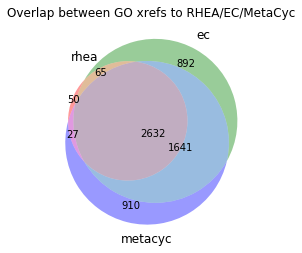

In [3]:
create_venn(df, 'rhea', 'ec', 'metacyc', title="Overlap between GO xrefs to RHEA/EC/MetaCyc")

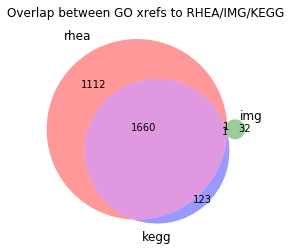

In [4]:
create_venn(df, 'rhea', 'img', 'kegg', title="Overlap between GO xrefs to RHEA/IMG/KEGG")

### UpSet Diagrams

These allow us to see counts of intersections for many sets at once

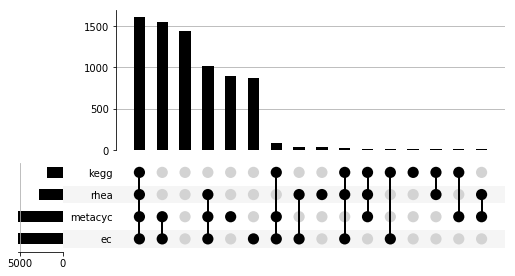

In [9]:
# Show upSet diagram for 4 databases, highlighting terms that have a unique referenced database
# TODO: Reactome
create_upset(df, ['kegg', 'rhea', 'metacyc', 'ec'])

Note how there is a large number (~1500) of activities that are common across kegg/rhea/metacyc/ec.

We can take a sample of these:

In [16]:
df.loc[(df['kegg'] != "") & (df['ec'] != "") & (df['rhea'] != "") & (df['metacyc'] != "")]

,class,class label,rhea,metacyc,ec,umbbd_enzyme,umbbd_reaction,kegg,img,is_leaf
28,GO:0046423,allene-oxide cyclase activity,RHEA:22592,MetaCyc:ALLENE-OXIDE-CYCLASE-RXN,EC:5.3.99.6,,,KEGG:R03402,,False
29,GO:0047768,"carboxy-cis,cis-muconate cyclase activity",RHEA:14977,MetaCyc:CARBOXY-CISCIS-MUCONATE-CYCLASE-RXN,EC:5.5.1.5,,,KEGG:R03308,,True
30,GO:0047805,cytidylate cyclase activity,RHEA:14737,MetaCyc:CYTIDYLATE-CYCLASE-RXN,EC:4.6.1.6,,,KEGG:R00574,,True
31,GO:0047820,D-glutamate cyclase activity,RHEA:22360,MetaCyc:D-GLUTAMATE-CYCLASE-RXN,EC:4.2.1.48,,,KEGG:R01583,,True
32,GO:0047926,geranyl-diphosphate cyclase activity,RHEA:18209,MetaCyc:GERANYL-DIPHOSPHATE-CYCLASE-RXN,EC:5.5.1.8,,,KEGG:R02007,,True
86,GO:0033797,selenate reductase activity,RHEA:14031,MetaCyc:RXN0-2101,EC:1.97.1.9,,UM-BBD_reactionID:r0828,KEGG:R07229,,True
113,GO:0047143,chlorate reductase activity,RHEA:16349,MetaCyc:1.97.1.1-RXN,EC:1.97.1.1,,UM-BBD_reactionID:r0981,KEGG:R03575,,True
170,GO:0004325,ferrochelatase activity,RHEA:22584,MetaCyc:PROTOHEMEFERROCHELAT-RXN,EC:4.99.1.1,,,KEGG:R00310,,False
182,GO:0047720,indoleacetaldoxime dehydratase activity,RHEA:23156,MetaCyc:RXN-1403,EC:4.99.1.6,,,KEGG:R04093,,True
193,GO:0050335,thiocyanate isomerase activity,RHEA:10004,MetaCyc:THIOCYANATE-ISOMERASE-RXN,EC:5.99.1.1,,,KEGG:R04010,,True


There is also a high number without any xrefs (3rd grouping from left). Some of these may represent grouping or non-leaf activities; we can see this by adding another subset, the leaf classes:

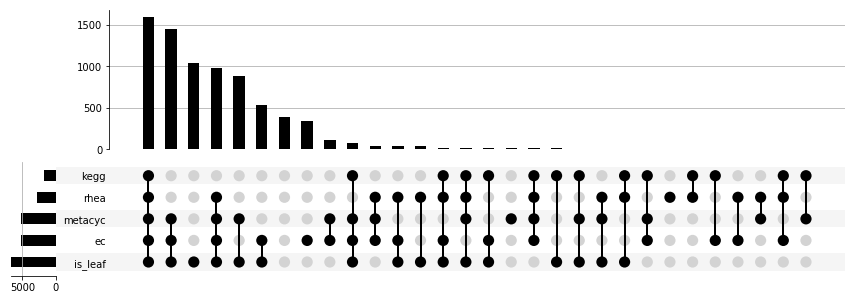

In [11]:
# Include leaf nodes
create_upset(df, ['kegg', 'rhea', 'metacyc', 'ec', 'is_leaf'])

This shows that of the ~1400 GO terms without xrefs, the majority (~1000, 3rd column) are actually leaf, the rest (~400) are non-leaf.

We can also see that most xrefs are for leaf nodes. We can see that non-leaf nodes favor EC and MetaCyc, as expected.

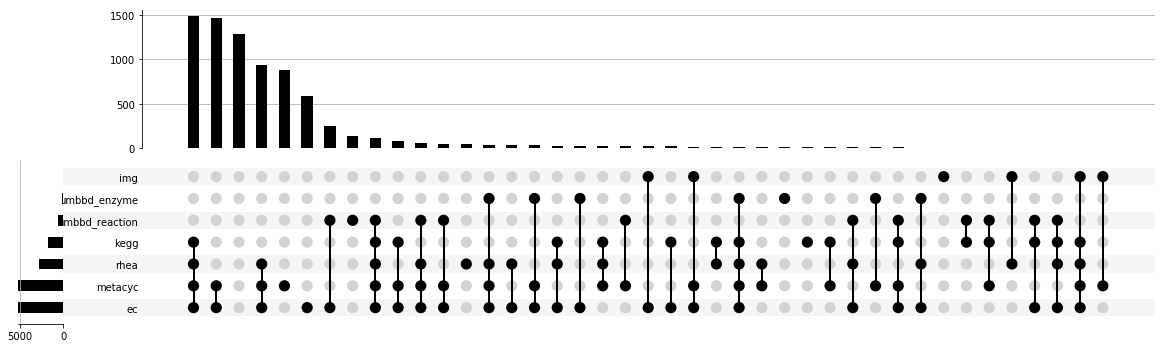

In [10]:
create_upset(df, dbs)

We can also see how these numbers interact with whether the GO class is a leaf node or not:

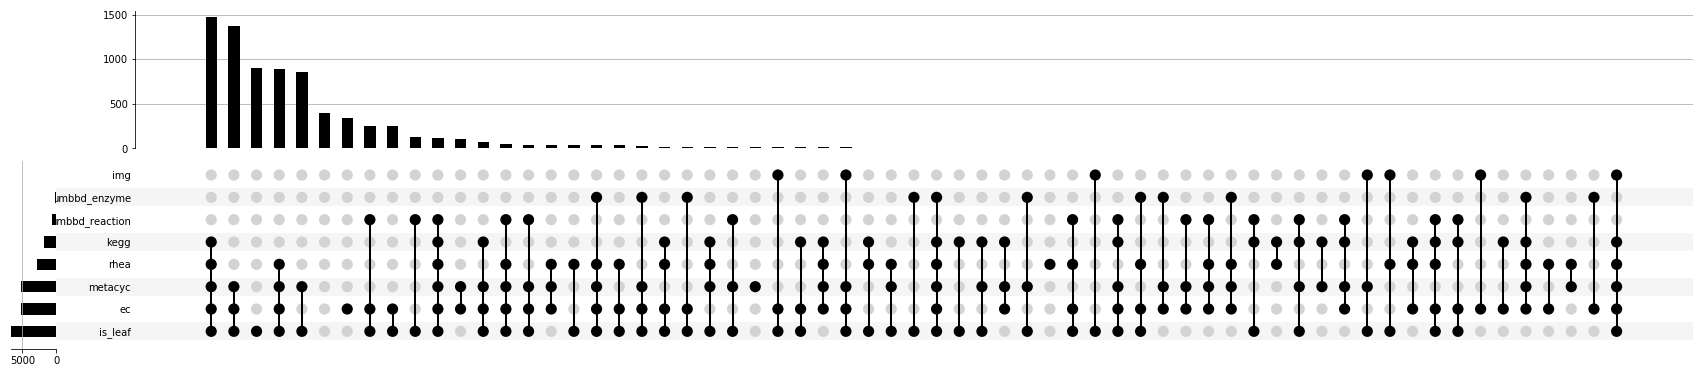

In [27]:
create_upset(df, dbs + ['is_leaf'])

## Rhea Xref Analysis

![img](https://www.rhea-db.org/images/rhea_logo.png)

We now look at xrefs from the perspective of Rhea.

For this analysis we supplant the Rhea-derived xrefs (from the Rhea RDF file) with our own GO xrefs, together with UniProt "xrefs"

In [6]:
# Load Rhea-xref summary from repo
df1 = pd.read_csv("reports/rhea_xref_summary.tsv", sep="\t").fillna("")
# Extra step to turn direction column (values G/BI/DI) into dummy boolean columns
df = pd.get_dummies(df1, columns=['direction'])
# Show sample
df

,rhea,rhea label,go,go label,metacyc,metacyc label,ecocyc,kegg,kegg label,ec,ec label,uniprot,direction_bi,direction_di,direction_g
0,rh:10368,"2-oxoglutarate + dTDP-4-amino-4,6-dideoxy-D-ga...",GO:0019180,"dTDP-4-amino-4,6-dideoxygalactose transaminase...",,,,,,2.6.1.59,,P27833,0,0,1
1,rh:10592,"a 3',5'-unsubstituted flavanone + O2 + reduced...",,,,,,,,,,,0,0,1
2,rh:10596,ATP + L-tyrosyl-[protein] = ADP + H(+) + O-pho...,,,,,,,,2.7.10.1|2.7.10.2|2.7.12.1|2.7.12.2,|||,A0JM20|A0JNB0|A0M8R7|A0M8S8|A1A5H8|A1X150|A1Y2...,0,0,1
3,rh:10600,prostaglandin H2 = prostaglandin D2,GO:0004667,prostaglandin-D synthase activity,,,,,,5.3.99.2,,O02853|O09114|O35543|O60760|O73888|O97921|P220...,0,0,1
4,rh:10608,O2 + reduced [NADPH--hemoprotein reductase] + ...,GO:0016710,trans-cinnamate 4-monooxygenase activity,,,,,,1.14.14.91,,O24312|O81928|P37114|P37115|P48522|P92994|Q044...,0,0,1
5,rh:10616,"(2R,3S)-catechin + H2O + NADP(+) = (2R,3S,4S)-...",GO:0033788,leucoanthocyanidin reductase activity,,,,,,1.17.1.3,,Q84V83,0,0,1
6,rh:10624,2 ATP + CO2 + H2O + NH4(+) = 2 ADP + carbamoyl...,GO:0004087,carbamoyl-phosphate synthase (ammonia) activity,,,,,,,,,0,0,1
7,rh:10628,phosphate + tRNA(n+1) = a ribonucleoside 5'-di...,,,,,,,,2.7.7.56,,A0AHX9|A0K5H3|A0L1S6|A0PUG0|A0Q4X5|A0QD04|A0R1...,0,0,1
8,rh:10636,D-mannonate + NADP(+) = D-mannuronate + H(+) +...,,,,,,,,1.1.1.131,,,0,0,1
9,rh:10640,"5-oxo-2,5-dihydro-2-furylacetate = cis,cis-muc...",GO:0018849,muconate cycloisomerase activity,,,,,,,,,0,0,1


### Venn Overlaps of Rhea Xrefs

Show co-occurrences of xrefs from Rhea to other databases

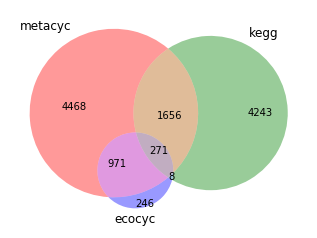

In [26]:
create_venn(df, 'metacyc', 'kegg', 'ecocyc')

#### Rhea xrefs to UniProt

Note we include "xrefs" from Rhea to UniProt that actually represent annotations of the UniProt entry with the Rhea ID

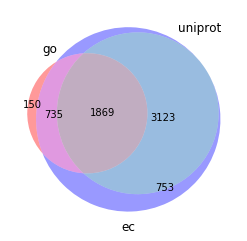

In [20]:
create_venn(df, 'go', 'uniprot', 'ec')

Note that this shows us there are 3123 + 753 Rhea IDs that are have been used to annotation UniProt but do not have GO IDs, and **thus the annotations have presumably not propagated to GO!**

#### Rhea xrefs to GO+MetaCyc+EC

When we include this combo we see something unusual:

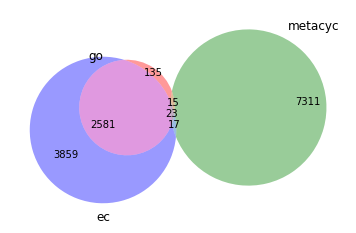

In [28]:
create_venn(df, 'go', 'metacyc', 'ec')

Note that GO/EC and MetaCyc are almost entirely non-overlapping!

This may seem unusual, but all is explained if we also show how the directionality. For this we switch to upset diagrams.

### Rhea-Upset diagrams

#### Rhea-Upset, including directionality, excluding UniProt

We exclude UniProt first of all for simplicity

Key:

 * `direction_g` = generic (`UN` in rhea xref file)
 * `direction_bi` = bidirectional (`BI` in rhea xref file)
 * `direction_di` = directional (`DI` in rhea xref file)

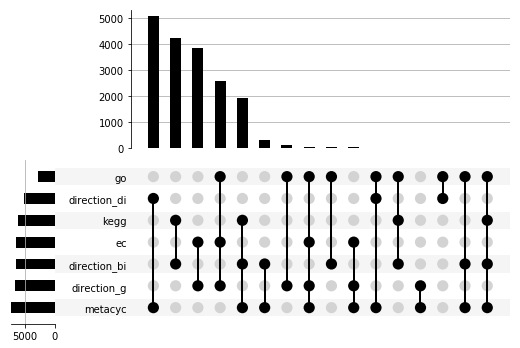

In [29]:
# Filter out any Rhea IDs that have no xrefs to the main 4 sources
df_with_xref = df.loc[(df['kegg'] != "") | (df['ec'] != "") | (df['go'] != "") | (df['metacyc'] != "")]

create_upset(df_with_xref, ['go', 'ec', 'metacyc', 'kegg', 'direction_bi', 'direction_di', 'direction_g'])

This explains the non-overlap in the Venn diagrams. We can see that excluding Rhea reactions with no xrefs, the biggest combo is Rhea reactions that have a unique xref to MetaCyc and are directional; the next biggest is KEGG+bidirectional.

We can look at a larger upset diagram, this time including UniProt and Rhea IDs with no xrefs (these form the largest group)

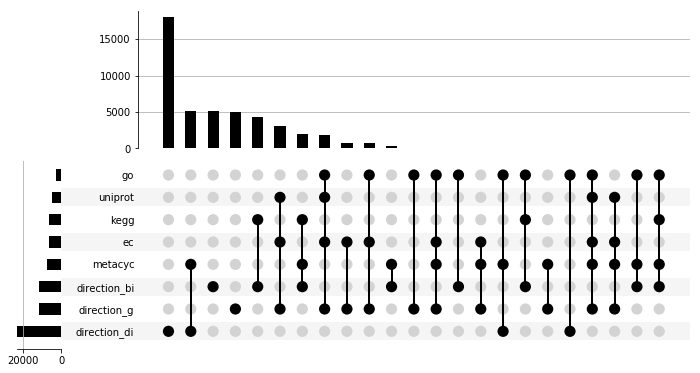

In [22]:
create_upset(df, ['go', 'uniprot', 'ec', 'metacyc', 'kegg', 'direction_bi', 'direction_di', 'direction_g'])

### Visualize distribution of referenced database vs direction

First some code to take the summarized xref data and turn it into a table more suited to a grouped bar plot:

In [20]:
df1 = pd.read_csv("reports/rhea_xref_summary.tsv", sep="\t").fillna("")
def make_items(r):
    items = []
    for c in ['ec', 'go', 'metacyc', 'ecocyc', 'uniprot', 'kegg']:
        if r[c] != "":
            item = {'rhea': r['rhea'],
                   'direction' : r['direction'],
                    'db': c}
            items.append(item)
    return items

items = []
for _,r in df1.iterrows():
    items += make_items(r)
items[0:5]
df = pd.DataFrame(items)

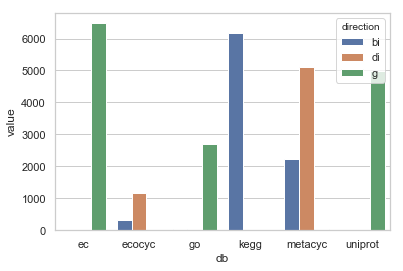

In [21]:
ct = pd.crosstab(df.db, df.direction)
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
sns.barplot(x=stacked.db, y=stacked.value, hue=stacked.direction)

Note this has implications for the meaning of GO xrefs

## Gap Filling Xrefs

TODO!

## Methods

This notebook and underlying TSV files here are stored in this repo
https://github.com/cmungall/reactioner

The repo also contains code for regenerating these, should all be orchestratable via Make/Docker